![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/04_Hyperparameter%20Tuning%20with%20Cross%20Validation/04_cross-validation_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Load the Data

- We take some dataset from the _[Machine Learning Data Repository UCI](https://archive.ics.uci.edu/ml/datasets/adult)_
- The aim is to predict weather a **person** (rows) `earned>50k` a year or not
- Based on their **social-demographic features** (columns)

PD: You may see the column names & meanings [here ↗](https://archive.ics.uci.edu/ml/datasets/adult).

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df_salary = pd.read_csv(url, header=None, na_values=' ?')
df_salary.rename(columns={14: 'target'}, inplace=True)
df_salary.columns = [str(i) for i in df_salary.columns]
df_salary.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Preprocess the Data

In [2]:
#Check for missing values
df_salary.isna().sum()

0            0
1         1836
2            0
3            0
4            0
5            0
6         1843
7            0
8            0
9            0
10           0
11           0
12           0
13         583
target       0
dtype: int64

In [3]:
#Drop the missing values
df_salary = df_salary.dropna()


In [4]:
#get dummy columns
df_salary = pd.get_dummies(data=df_salary , drop_first=True)
df_salary

,0,2,4,10,11,12,1_ Local-gov,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Male,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia,target_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Feature Selection

In [5]:
#pass in explanatory columns in explanatory variable and choose the target variable that we want to predit
explanatory = df_salary.iloc[:,:-1]
target = df_salary.iloc[:,-1]


## `train_test_split()` the Data

In [7]:
# Import modules and instantiate 
# Do the train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(explanatory, target, test_size=0.33, random_state=42)

## `DecisionTreeClassifier()` with Default Hyperparameters

In [8]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X= X_train , y= y_train)

DecisionTreeClassifier()

### Accuracy

#### > In `train` data

In [9]:
model_dt.score(X_train , y_train)

1.0

#### > In `test` data

In [10]:
model_dt.score(X_test, y_test)

0.8109302792847096

### Model Visualization

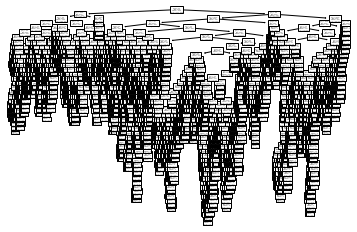

In [11]:
from sklearn.tree import plot_tree
plot_tree(model_dt);

## Interpretation

- [ ] Why the difference on accuracy is so much?

## `DecisionTreeClassifier()` with Custom Hyperparameters

In [12]:
from sklearn.tree import DecisionTreeClassifier
model_dt1 = DecisionTreeClassifier(random_state=0, max_depth=4, criterion='gini', min_samples_leaf = 1)
model_dt1.fit(X= X_train , y= y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### 1st Configuration

#### Accuracy

##### > In `train` data

In [13]:
model_dt1.score(X_train , y_train)

0.840360253365004

##### > In `test` data

In [14]:
model_dt.score(X_test, y_test)

0.8109302792847096

#### Model Visualization

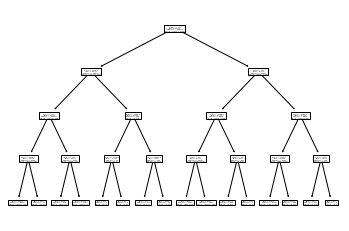

In [15]:
plot_tree(model_dt1);


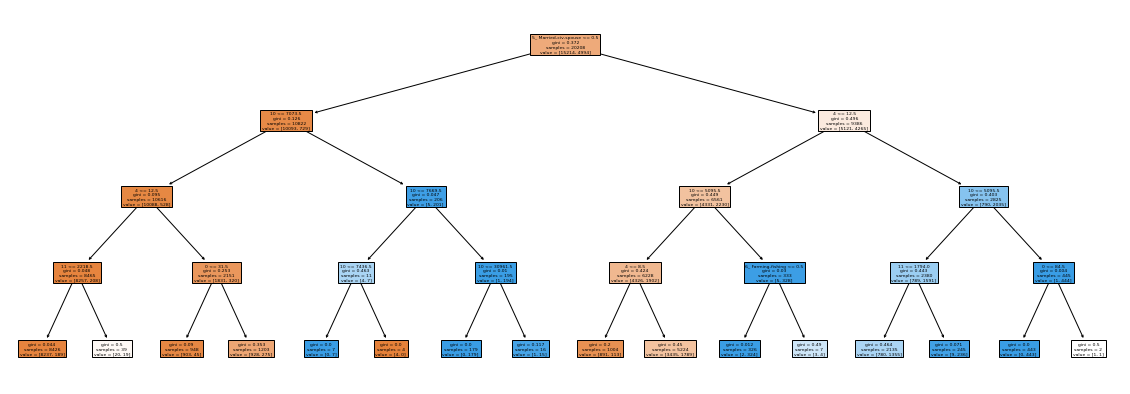

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
plot_tree(decision_tree=model_dt1, feature_names= explanatory.columns , filled= True);

### 2nd Configuration

In [20]:
model_dt2 = DecisionTreeClassifier(random_state=3, max_depth=8, criterion='gini', min_samples_leaf = 1)
model_dt2.fit(X= X_train , y= y_train)

DecisionTreeClassifier(max_depth=8, random_state=3)

In [21]:
# Accuracy on training set
model_dt2.score(X_train , y_train)

0.859709026128266

In [22]:
# Accuracy on test set
model_dt2.score(X_test, y_test)

0.8517179023508138

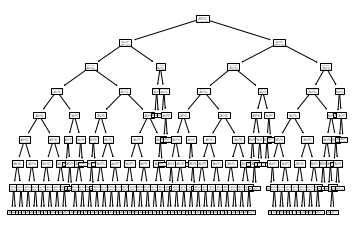

In [23]:
#Model Visualization
plot_tree(model_dt2);

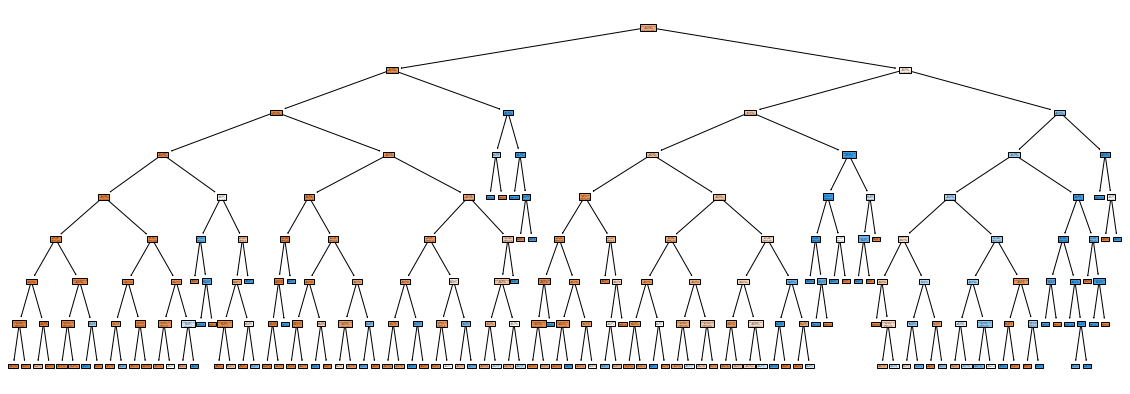

In [24]:
plt.figure(figsize=(20,7))
plot_tree(decision_tree=model_dt2, feature_names= explanatory.columns , filled= True);

### 3rd Configuration

In [25]:
model_dt3 = DecisionTreeClassifier(random_state=5, max_depth=12, criterion='entropy', min_samples_leaf = 1)
model_dt3.fit(X= X_train , y= y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=5)

In [26]:
# Accuracy on training set
model_dt3.score( X_train , y_train)

0.8768309580364212

In [27]:
# Accuracy on test set
model_dt3.score(X_test, y_test)

0.851918826602371

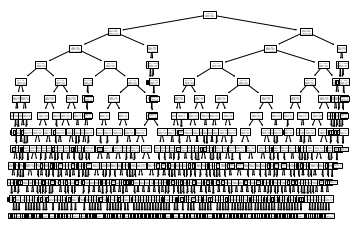

In [28]:
#Model Visualization
plot_tree(model_dt3);

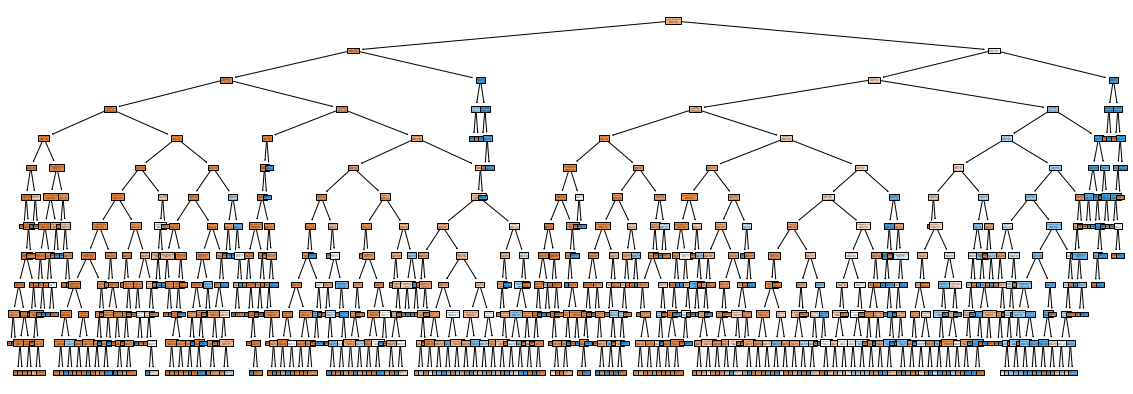

In [29]:
plt.figure(figsize=(20,7))
plot_tree(decision_tree=model_dt3, feature_names= explanatory.columns , filled= True);

### 4th Configuration

In [30]:
model_dt4 = DecisionTreeClassifier(random_state=1, max_depth=15, criterion="gini", min_samples_leaf = 1)
model_dt4.fit(X= X_train , y= y_train)

DecisionTreeClassifier(max_depth=15, random_state=1)

In [31]:
# Accuracy on training set
model_dt4.score(X_train , y_train)

0.9029592240696753

In [32]:
# Accuracy on test set
model_dt4.score(X_test, y_test)

0.8435804701627486

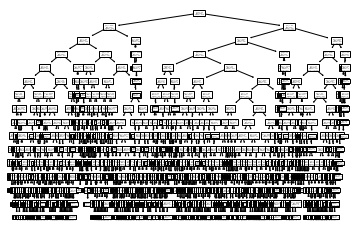

In [33]:
#Model Visualization
plot_tree(model_dt4);

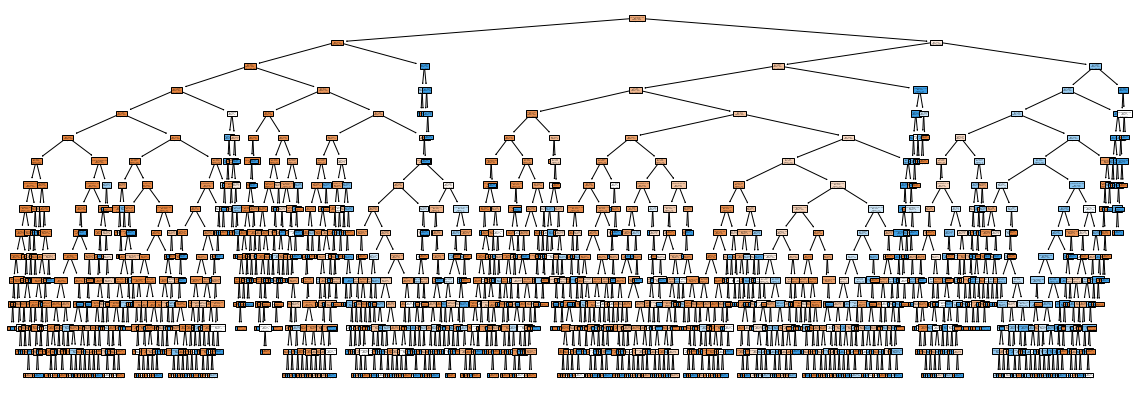

In [34]:
plt.figure(figsize=(20,7))
plot_tree(decision_tree=model_dt4, feature_names= explanatory.columns , filled= True);

### 5th Configuration

In [35]:
model_dt5 = DecisionTreeClassifier(random_state=0, max_depth=30, criterion="log_loss", min_samples_leaf = 1)
model_dt5.fit(X= X_train , y= y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=30, random_state=0)

In [36]:
# Accuracy on training set
model_dt5.score(X_train , y_train)

0.97555423594616

In [37]:
# Accuracy on test set
model_dt5.score(X_test, y_test)

0.8164556962025317

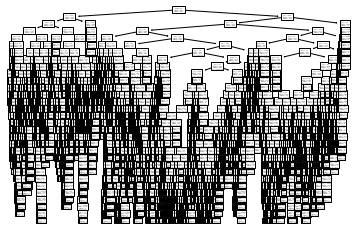

In [38]:
#Model Visualization
plot_tree(model_dt5);

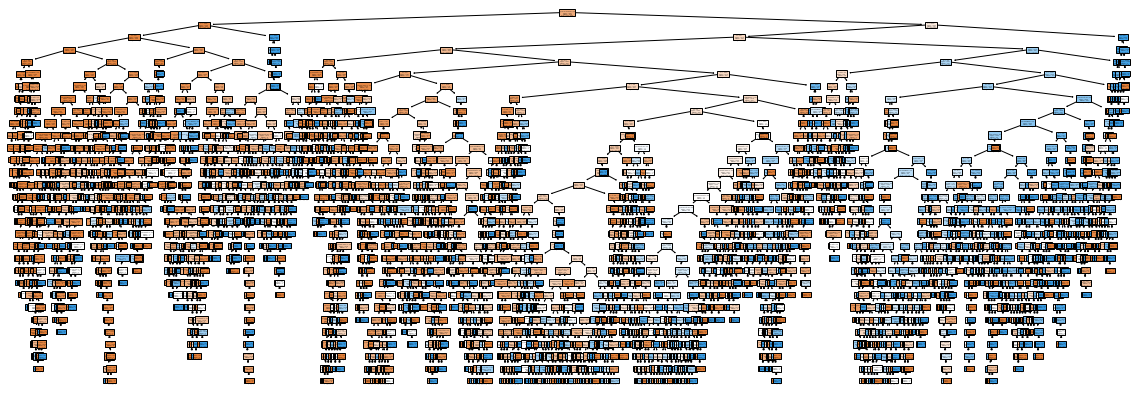

In [39]:
plt.figure(figsize=(20,7))
plot_tree(decision_tree=model_dt5, feature_names= explanatory.columns , filled= True);

## `GridSearchCV()` to find Best Hyperparameters

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 50, 100, 200, 400, 800, 1600],
    'criterion': ['gini', 'entropy']
}

In [41]:
cv_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, verbose=1)
cv_dt.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 50, 100, 200, 400, 800, 1600]},
             verbose=1)

In [42]:
cv_dt.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100)

## Other Models

### Support Vector Machines `SVC()`

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [ ]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_norm = pd.DataFrame(scaler.fit_transform(explanatory), columns=explanatory.columns)


In [44]:
X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, target, test_size=0.33, random_state=42)

In [45]:
from sklearn.svm import SVC
model_sv = SVC()

In [46]:
model_sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [47]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

cv_sv = GridSearchCV(estimator=model_sv, param_grid=param_grid, verbose=2)
cv_sv.fit(X_norm_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=  19.7s
[CV] END ...............................C=0.1, kernel=linear; total time=  16.6s
[CV] END ...............................C=0.1, kernel=linear; total time=  15.1s
[CV] END ...............................C=0.1, kernel=linear; total time=  16.0s
[CV] END ...............................C=0.1, kernel=linear; total time=  16.8s
[CV] END ..................................C=0.1, kernel=rbf; total time=  16.9s
[CV] END ..................................C=0.1, kernel=rbf; total time=  17.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=  16.3s
[CV] END ..................................C=0.1, kernel=rbf; total time=  17.3s
[CV] END ..................................C=0.1, kernel=rbf; total time=  12.5s
[CV] END .................................C=1, kernel=linear; total time=  16.7s
[CV] END .................................C=1, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             verbose=2)

In [48]:
cv_sv.best_params_


{'C': 10, 'kernel': 'linear'}

## `KNeighborsClassifier()`

In [ ]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HVXime0nQeI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [49]:
from sklearn.neighbors import KNeighborsClassifier

model_kn = KNeighborsClassifier()
model_kn.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [50]:
param_grid = {
    'leaf_size': [10, 20, 30, 50],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'n_neighbors': [3, 5, 10, 20]
}

cv_kn = GridSearchCV(estimator=model_kn, param_grid=param_grid, verbose=2)
cv_kn.fit(X_norm_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.4s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.2s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.2s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.2s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.2s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.2s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.2s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.2s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.2s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.2s
[CV] END .....leaf_size=10, metric=minkowski, n_neighbors=10; total time=   0.2s
[CV] END .....leaf_size=10, metric=minkowski, n

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 50],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 10, 20]},
             verbose=2)

In [51]:
cv_kn.best_params_

{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 20}

# Best Model with Best Hyperparameters

In [52]:
dic_results = {
    'model': [
        cv_dt.best_estimator_,
        cv_sv.best_estimator_,
        cv_kn.best_estimator_
    ],
    'hyperparameters': [
        cv_dt.best_params_,
        cv_sv.best_params_,
        cv_kn.best_params_
    ],
    'score': [
        cv_dt.score(X_test, y_test),
        cv_sv.score(X_norm_test, y_test),
        cv_kn.score(X_norm_test, y_test)
    ]
}

df_cv_comp = pd.DataFrame(dic_results)
df_cv_comp.style.background_gradient()


,model,hyperparameters,score
0,"DecisionTreeClassifier(max_depth=10, min_samples_leaf=100)","{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 100}",0.849307
1,"SVC(C=10, kernel='linear')","{'C': 10, 'kernel': 'linear'}",0.849106
2,"KNeighborsClassifier(leaf_size=10, n_neighbors=20)","{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 20}",0.827707


DecisionTreeClassifier with hyperparameters set at (max_depth=10, min_samples_leaf=100) is the best model!

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [X] Even a model can be bettered
- [X] The goal is to make models that perform a better accuracy on data not seen
    - The banks would like to know if a **future client** will be able to pay the loan
    - Not a past client
    - Unfortunately, we do not have data for future clients
    - So, we fix this with `Data Splitting` into
        - Train
            - Fold Validation
        - Test
- [X] Understand the Machine Learning Applications to businesses
    - To predict if a customer will pay the loan
    - To predict if an athlete will have an injury